# Imposed convective heat flux BC in VEF

In [1]:
from trustutils import run

run.introduction("N. DJATI (CS)")

## Introduction 
 Validation made by : N. DJATI (CS)



 Report generated 26/01/2022

### Description 
**Paroi_echange_externe_impose** is a keyword allowing to impose a convective heat flux (and an external temperature) on a given boundary when dealing with energy equation. Before TRUST V1.8.0, computed stability time steps did not take into account the value of the heat flux on the boundary in VEF disrectization. This makes the computation diverging if the Biot number (which is the ratio of heat transfer by convection to heat transfer by conduction) is greater than unity.\
The current verification form aims to validate the new time-step computation in VEF in 2D and 3D configurations.

In [2]:
run.TRUST_parameters("1.8.0")

### TRUST parameters 
 * Version TRUST: 1.8.0
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/Conduction_h_imp_on_BC/build)

In [3]:
from trustutils import run 
c1 = run.addCase("conduc2D"   ,"Conduc2D_h_imp.data"          )
c2 = run.addCase("conduc3D"   ,"Conduc3D_h_imp.data"          ) 
c1 = run.addCase("conduc2Dimp","Conduc2D_h_imp_implicite.data")
c2 = run.addCase("conduc3Dimp","Conduc3D_h_imp_implicite.data")
run.printCases()

### Test cases 
* conduc2D/Conduc2D_h_imp.data : 
* conduc3D/Conduc3D_h_imp.data : 
* conduc2Dimp/Conduc2D_h_imp_implicite.data : 
* conduc3Dimp/Conduc3D_h_imp_implicite.data : 


In [4]:
run.runCases()

Running **with Sserver**...
  => A total of 4 cases were (successfully) run in 14.5s.


## Introduction
Before TRUST 1.8.0, the diffusive time step was computed as

\begin{equation} 
\Delta t = \beta \frac{(\Delta x)^{2}}{D} 
\end{equation} 

Since the version 1.8.0, in VEF discretization, we compute Biot number given by 

\begin{equation*} 
Bi = \frac{h \Delta x}{\lambda} 
\end{equation*}

and we use expression (1) if Bi<1 and :

\begin{equation} 
\Delta t = \beta \frac{\lambda \Delta x}{h D} 
\end{equation} 

in the case where Bi > 1

## One-dimensional heat conduction within a 2D solid medium with uniform thermophysical properties
The first test case of this validation form concerns a problem of type **pb_conduction** as shown hereafter.\
We consider that the solid of size 1x1 has a density of 2 kg.m-3, a thermal conductivity of 0.1 W.m-1.K-1 and a Cp of 0.5 J.kg-1.K. We set the temperature at the left wall to 0 and we impose a heat flux of 20 W.m-2.K on the other side. We consider also that the outer temperature is equal to 100.

At the steady state, the heat flux equilibrium at the right boundary can be expressed by:

\begin{equation}
h (T_{ext} - T_W ) = - \frac{\lambda (T_W - T_{left})}{L}
\end{equation} 

which yields

\begin{equation}
T_W  = \left(T_{ext} + \frac{\lambda}{hL} T_{left} \right) \left/ \left(1 + \frac{\lambda}{hL}\right) \right.
\end{equation} 

Since   $T_{left} = 0$, equation (4) can be simplified to 

\begin{equation} 
T_W  = \frac{T_{ext}} {\left(1 + \frac{\lambda}{hL}\right)} = \frac{100}{\left(1 + \frac{0.1}{20} \right)} = 99.5
\end{equation} 

We treat this problem using an explicit and implicit time schemes in order to check that everything is okay. We will plot the residual of energy equation, the mean temperature at the wall with imposed heat flux BC and we will draw the temperature profile inside the domain.

In both, implicit and explicit time schemes, equation residuals decrease and wall temperature converges to the analytical value of 99.5 as shown on figures below. 

![](./build/pb_conduction.PNG)

### Equation residuals

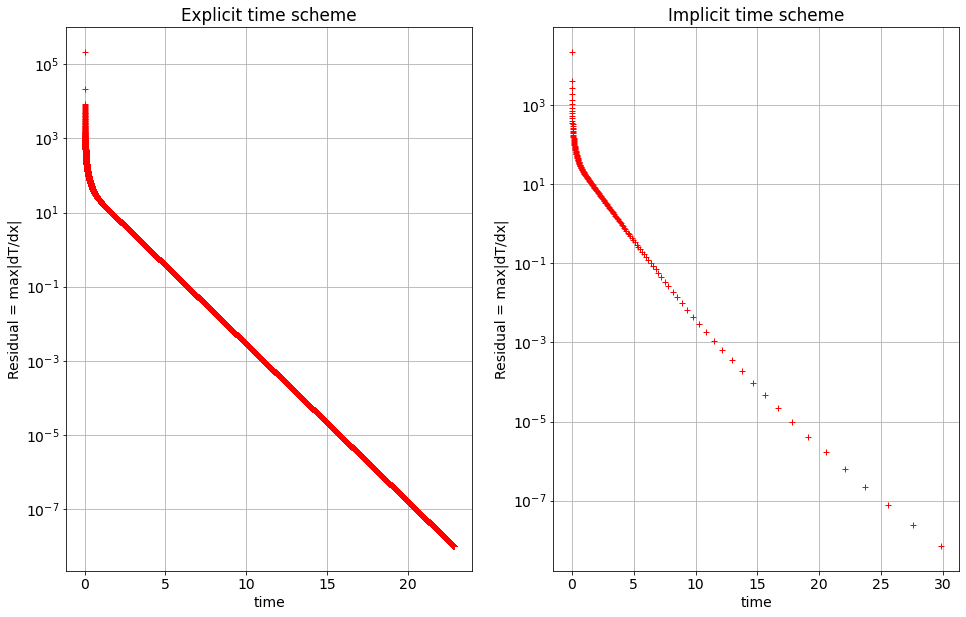

In [5]:
from trustutils import plot

a = plot.Graph(nY=2,size=[8,10])

x = plot.loadText('conduc2D/Conduc2D_h_imp.dt_ev')
a.add(x[0],x[5],'r+',title='Explicit time scheme')
a.label('time','Residual = max|dT/dx|')
a.scale(yscale='log')

x = plot.loadText('conduc2Dimp/Conduc2D_h_imp_implicite.dt_ev')
a.add(x[0],x[5],'r+',title='Implicit time scheme',yIndice=1)
a.label('time','Residual = max|dT/dx|')
a.scale(yscale='log')


### Temperature profile

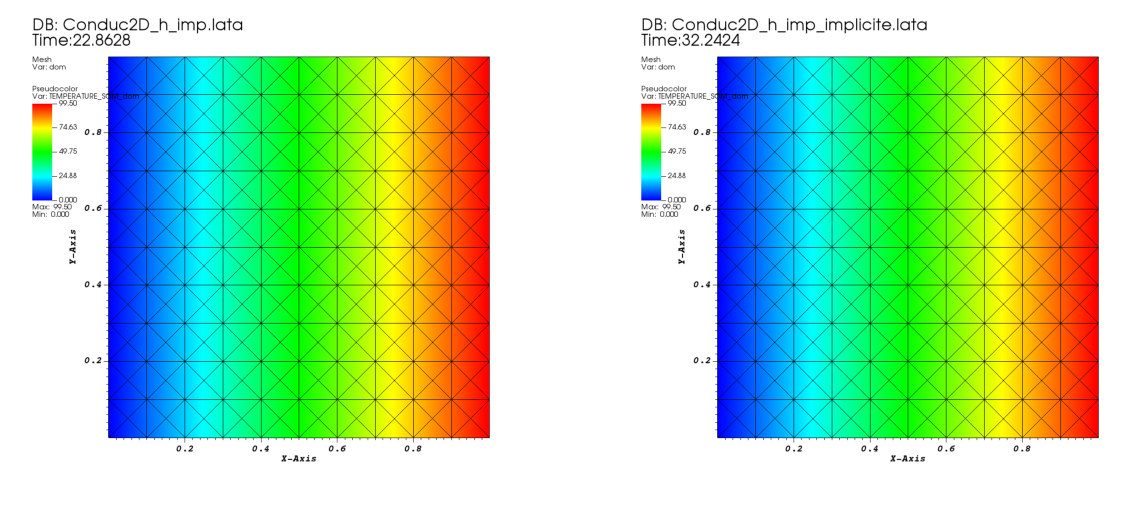

In [6]:
from trustutils import visit 

fig=visit.Show("./conduc2D/Conduc2D_h_imp.lata","Pseudocolor","TEMPERATURE_SOM_dom",nY=2)
fig.add("./conduc2Dimp/Conduc2D_h_imp_implicite.lata","Pseudocolor","TEMPERATURE_SOM_dom",yIndice=1)
fig.plot()

### Mean wall temperature

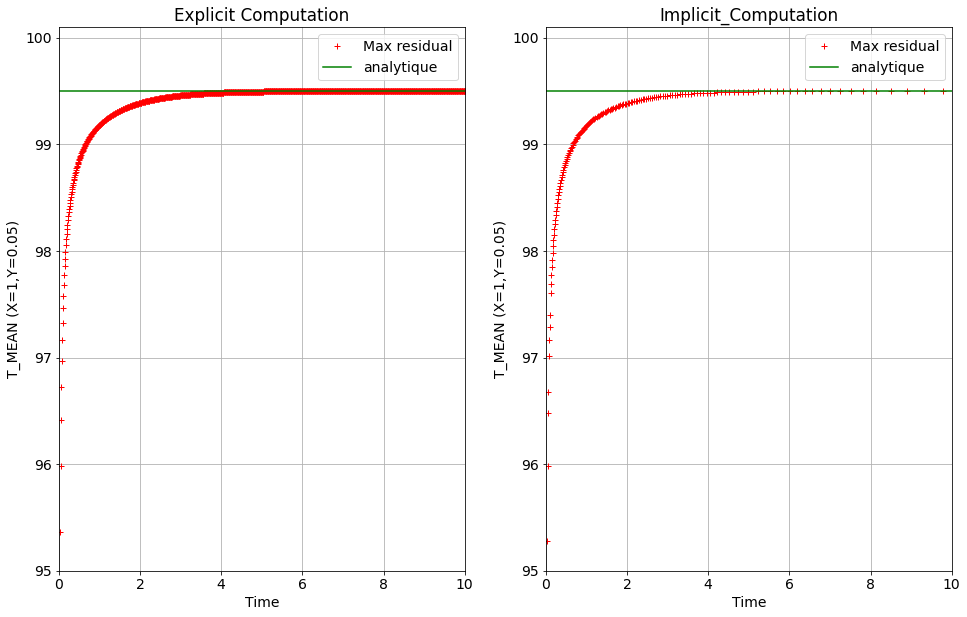

In [7]:
from trustutils import plot
import numpy as np

a=plot.Graph("Explicit Computation",size=[8,10],nY=2)
a.addPoint("./conduc2D/Conduc2D_h_imp_TMEAN.son", marker="+",color="r",label="Max residual")
a.add(np.linspace(0,10,100),99.5*np.ones(100), color='g',label="analytique")
a.visu(0,10,95,100.1)

a.addPlot(1,"Implicit_Computation")
a.addPoint("./conduc2Dimp/Conduc2D_h_imp_implicite_TMEAN.son",marker="+",color="r",label="Max residual")
a.add(np.linspace(0,10,100),99.5*np.ones(100), color='g',label="analytique")
a.visu(0,10,95,100.1)


## One-dimensional heat conduction within a 3D solid medium with uniform thermophysical properties
The second test case of this validation form is similar to the first one, except that it is in 3D and the imposed heat flux and external temperature are different. \
We consider that the solid of size 10x2x10 has a density of 2 kg.m-3, a thermal conductivity of 0.1 W.m-1.K-1 and a Cp of 0.5 J.kg-1.K. We set the temperature at the left wall to 0 and we impose a heat flux of 5 W.m-2.K on the other side. We consider also that the outer temperature is equal to 30.06. \

At the steady state, the heat flux equilibrium at the right boundary can be expressed by: \

\begin{equation}
h (T_{ext} - T_W ) = - \frac{\lambda (T_W - T_{left})}{L} 
\end{equation}


which yields 

\begin{equation} 
T_W  = (T_{ext} + \frac{\lambda}{hL} T_{left} ) / (1 + \frac{\lambda}{hL}) 
\end{equation} 

Since $T_{left} = 0$, equation (7) can be simplified to :

\begin{equation} 
T_W  = T_{ext} / (1 + \frac{\lambda}{hL}) = 30.06 / (1 + \frac{0.1}{5\times 10} ) = 30 
\end{equation} 
        
We treat this problem using an explicit and implicit time schemes in order to check that everything is okay. We will plot the residual of energy equation, the mean temperature at the wall with imposed heat flux BC and we will draw the temperature profile inside the domain.

In both, implicit and explicit time schemes, equation residuals decrease and wall temperature converges to the analytical value of 30 as shown on figures below.


### Equation residuals

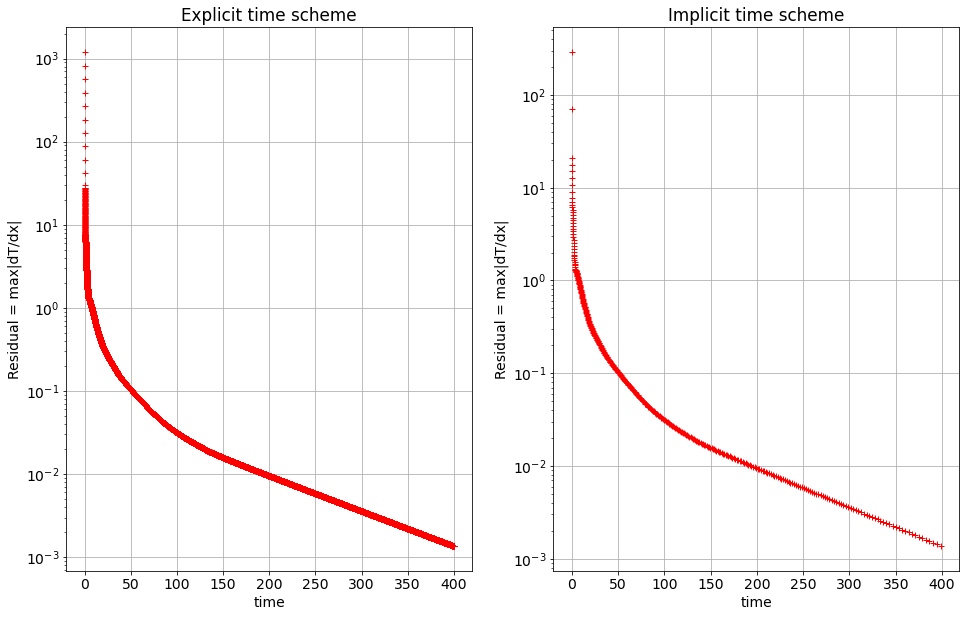

In [8]:
from trustutils import plot

a = plot.Graph(nY=2,size=[8,10])

x = plot.loadText('conduc3D/Conduc3D_h_imp.dt_ev')
a.add(x[0],x[5],marker='r+',title='Explicit time scheme')
a.label('time','Residual = max|dT/dx|')
a.scale(yscale='log')

x = plot.loadText('conduc3Dimp/Conduc3D_h_imp_implicite.dt_ev')
a.add(x[0],x[5],marker='r+',title='Implicit time scheme',yIndice=1)
a.label('time','Residual = max|dT/dx|')
a.scale(yscale='log')


### Temperature profile

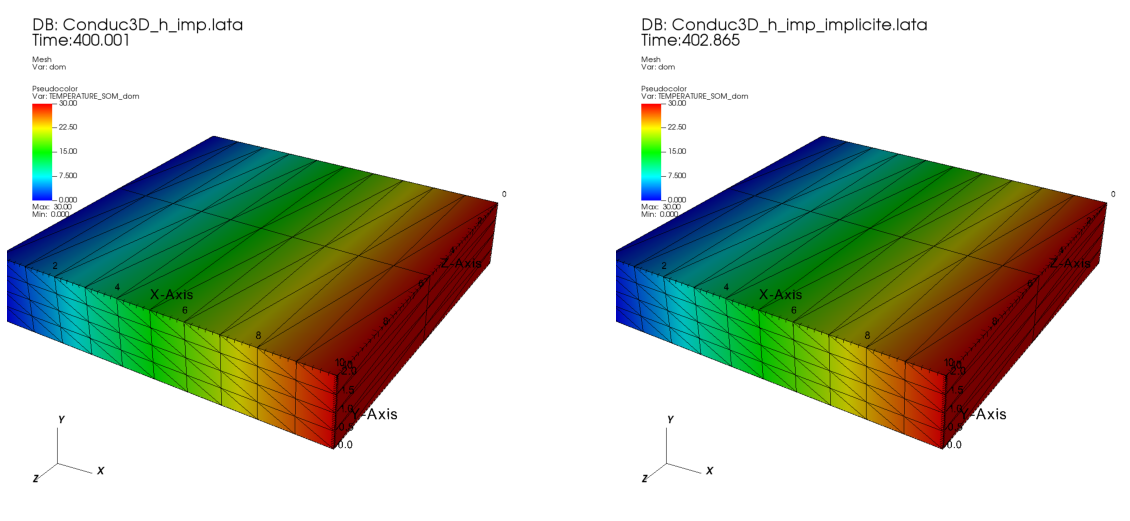

In [9]:
from trustutils import visit  

fig=visit.Show("./conduc3D/Conduc3D_h_imp.lata","Pseudocolor","TEMPERATURE_SOM_dom",nY=2)
fig.normal3D([0.454,0.477,0.733])
fig.add("./conduc3Dimp/Conduc3D_h_imp_implicite.lata","Pseudocolor","TEMPERATURE_SOM_dom",yIndice=1)
fig.normal3D([0.454,0.477,0.733])
fig.plot()

### Mean wall temperature

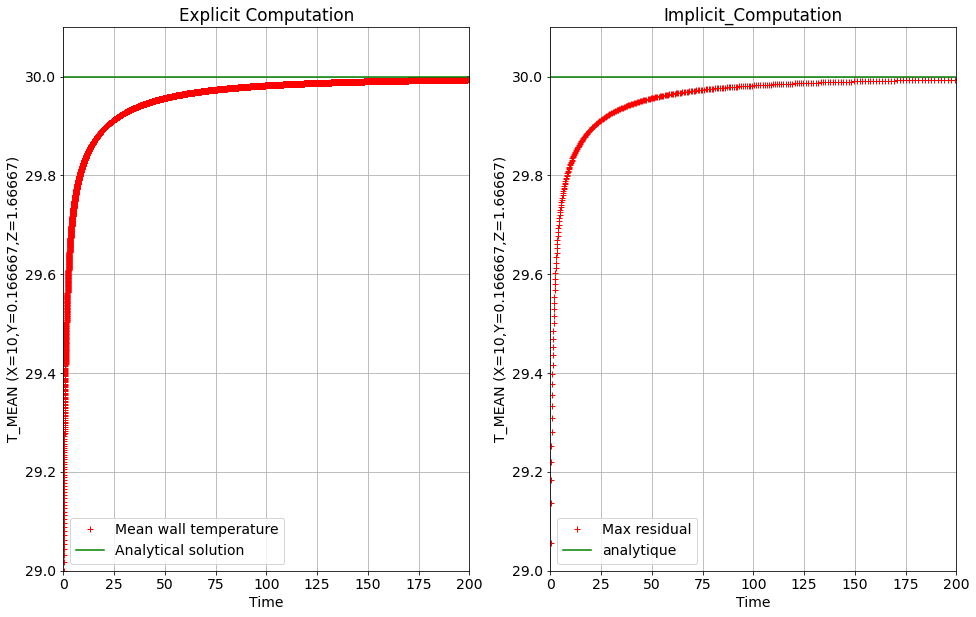

In [10]:
a=plot.Graph("Explicit Computation",size=[8,10],nY=2)
a.addPoint("./conduc3D/Conduc3D_h_imp_TMEAN.son",marker="+",color="r",label="Mean wall temperature")
a.add(np.linspace(0,200,100),30*np.ones(100), color='g',label="Analytical solution")
a.visu(0,200,29,30.1)

a.addPlot(1,"Implicit_Computation")
a.addPoint("./conduc3Dimp/Conduc3D_h_imp_implicite_TMEAN.son",marker="+",color="r",label="Max residual")
a.add(np.linspace(0,200,100),30*np.ones(100), color='g',label="analytique")
a.visu(0,200,29,30.1)

## Conclusion
We see that with the implicit and explicit computations converge to the analytical solution in both 2D and 3D configurations.